In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson
from helpers.trinity_plotting import set_plot_style

set_plot_style(style="dark")

<Figure size 960x720 with 0 Axes>

In [13]:
C_PHI = 4
LAMBDA = 1e6
MCHI = 1e3

In [14]:
# MY EQUATION

# Unit conversions
HC2_GEV2_TO_M2 = 3.89379e-32   # 1 GeV^-2 = 3.89379e-32 m^2  (fixed)
GEV2_TO_FB     = 3.89379e11    # 1 GeV^-2 = 3.89379e11 fb

# ---------- Kinematics ----------
def get_s_cm(mchi, k):
    """CoM frame: s = (sqrt(mchi^2 + k^2) + k)^2, with k = E_gamma."""
    return (np.sqrt(mchi**2 + k**2) + k)**2

def get_s_lab_DMrest(mchi, omega):
    """Lab frame (DM at rest): s = mchi^2 + 2 mchi * omega."""
    return mchi**2 + 2*mchi*omega

def get_t_cm(Eg, theta):
    """CoM frame: t = -2 Eg^2 (1 - cos(theta))."""
    return -2.0 * Eg**2 * (1.0 - np.cos(theta))

def get_t_lab_DMrest(mchi, omega, theta):
    """
    Lab frame (DM at rest): Compton-like kinematics with m_e -> mchi.
    omega' = omega / (1 + (omega/mchi)*(1-cosθ))
    t = -2 * omega * omega' * (1 - cosθ)
    """
    denom = 1.0 + (omega/mchi)*(1.0 - np.cos(theta))
    omega_out = omega / denom
    return -2.0 * omega * omega_out * (1.0 - np.cos(theta))

# ---------- dσ/dΩ ----------
def get_dsigma_dOmega(mchi, theta, E_gamma, *,
                      frame="cm",      # "cm" or "lab"
                      in_SI=False,
                      c_phi=C_PHI, Lambda=LAMBDA,
                      ):
    """
    mchi    : GeV
    theta   : radians
    E_gamma : photon energy (GeV). Interpreted as:
              - CM photon energy if frame="cm"
              - Lab incoming photon energy (DM at rest) if frame="lab"
    returns : fb/sr (default) or m^2/sr if in_SI=True
    """
    if frame == "lab":
        s = get_s_lab_DMrest(mchi, E_gamma)
        t = get_t_lab_DMrest(mchi, E_gamma, theta)
    else:
        s = get_s_cm(mchi, E_gamma)
        t = get_t_cm(E_gamma, theta)

    val = (c_phi**2 * t**2) / (Lambda**4 * 256 * np.pi**2 * s)  # GeV^-2 / sr
    return val * (HC2_GEV2_TO_M2 if in_SI else GEV2_TO_FB)


In [15]:
mchi = MCHI  #1 TeV

angles = np.linspace(0, 180, 100)
angles_rad = np.deg2rad(angles)

Eg_1GeV = np.ones(len(angles_rad)) * 1 #GeV
Eg_50GeV = np.ones(len(angles_rad)) * 50 #GeV
Eg_250GeV = np.ones(len(angles_rad)) * 250 #GeV
Eg_500GeV = np.ones(len(angles_rad)) * 500 #GeV
Eg_750GeV = np.ones(len(angles_rad)) * 750 #GeV

dsig_domega_Eg_1GeV = get_dsigma_dOmega(mchi, angles_rad, Eg_1GeV)
dsig_domega_Eg_50GeV = get_dsigma_dOmega(mchi, angles_rad, Eg_50GeV)
dsig_domega_Eg_250GeV = get_dsigma_dOmega(mchi, angles_rad, Eg_250GeV)
dsig_domega_Eg_500GeV = get_dsigma_dOmega(mchi, angles_rad, Eg_500GeV)
dsig_domega_Eg_750GeV = get_dsigma_dOmega(mchi, angles_rad, Eg_750GeV)


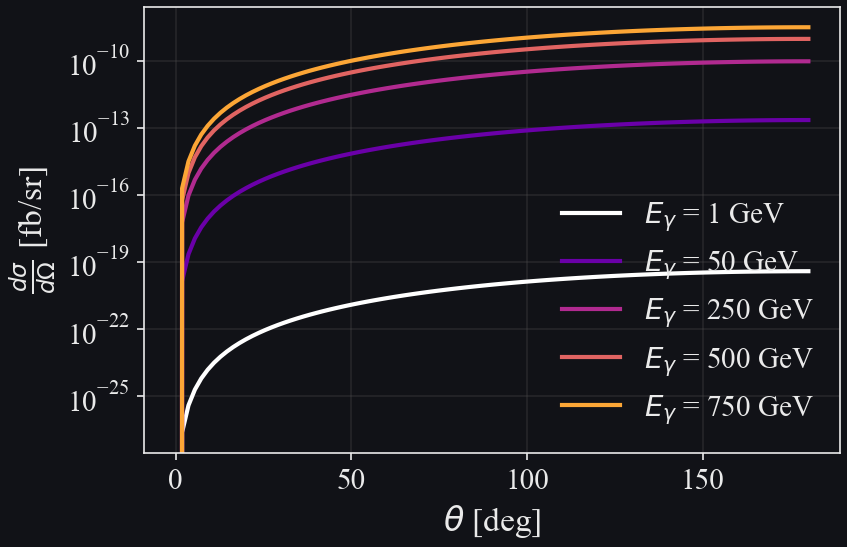

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(angles, dsig_domega_Eg_1GeV, label=r"$E_{\gamma}$ = 1 GeV")
ax.plot(angles, dsig_domega_Eg_50GeV, label=r"$E_{\gamma}$ = 50 GeV")
ax.plot(angles, dsig_domega_Eg_250GeV, label=r"$E_{\gamma}$ = 250 GeV")
ax.plot(angles, dsig_domega_Eg_500GeV, label=r"$E_{\gamma}$ = 500 GeV")
ax.plot(angles, dsig_domega_Eg_750GeV, label=r"$E_{\gamma}$ = 750 GeV")
ax.set_xlabel(r"$\theta$ [deg]")
ax.set_ylabel(r"$\frac{d\sigma}{d\Omega}$ [fb/sr]")
plt.legend()
#plt.title("Dependence of Differential Cross Section on Angle")
plt.yscale("log")

plt.savefig("plots/Weakly_dep_on_angle.png")
plt.show()

In [17]:
mchi = MCHI  #1 TeV as in paper

energies = np.linspace(0, 1000, 200)

angle10 = np.ones(len(energies)) * np.deg2rad(10) #rad
angle45 = np.ones(len(energies)) * np.deg2rad(45) #rad
angle60 = np.ones(len(energies)) * np.deg2rad(60) #rad
angle90 = np.ones(len(energies)) * np.deg2rad(90) #rad
angle180 = np.ones(len(energies)) * np.deg2rad(180) #rad

dsig_domega_10deg = get_dsigma_dOmega(mchi, angle10, energies)
dsig_domega_45deg = get_dsigma_dOmega(mchi, angle45, energies)
dsig_domega_60deg = get_dsigma_dOmega(mchi, angle60, energies)
dsig_domega_90deg = get_dsigma_dOmega(mchi, angle90, energies)
dsig_domega_180deg = get_dsigma_dOmega(mchi, angle180, energies)


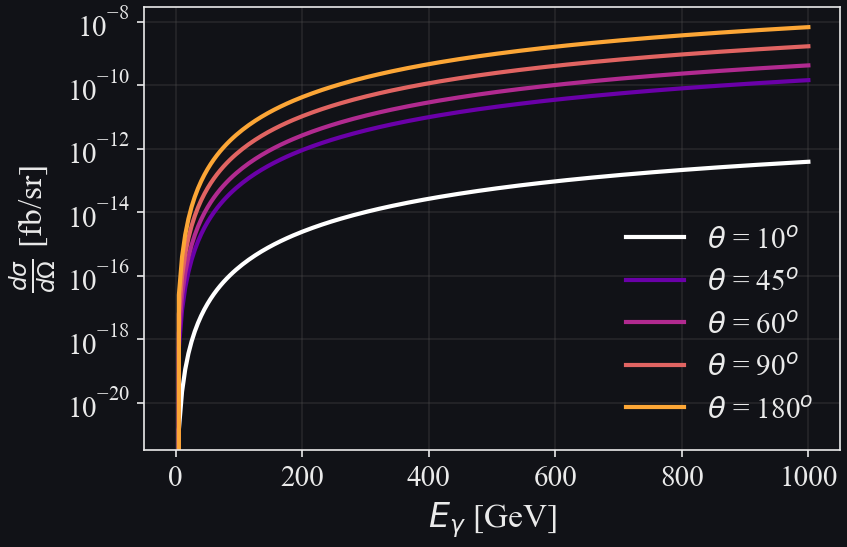

In [18]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(energies, dsig_domega_10deg, label=r"$\theta$ = 10$^o$")
ax.plot(energies, dsig_domega_45deg, label=r"$\theta$ = 45$^o$")
ax.plot(energies, dsig_domega_60deg, label=r"$\theta$ = 60$^o$")
ax.plot(energies, dsig_domega_90deg, label=r"$\theta$ = 90$^o$")
ax.plot(energies, dsig_domega_180deg, label=r"$\theta$ = 180$^o$")
ax.set_xlabel(r"$E_{\gamma}$ [GeV]")
ax.set_ylabel(r"$\frac{d\sigma}{d\Omega}$ [fb/sr]")
plt.legend()
#plt.title("Dependence of Differential Cross Section on Photon Energy")
plt.yscale("log")

plt.savefig("plots/Weakly_dep_on_egamma.png")
plt.show()

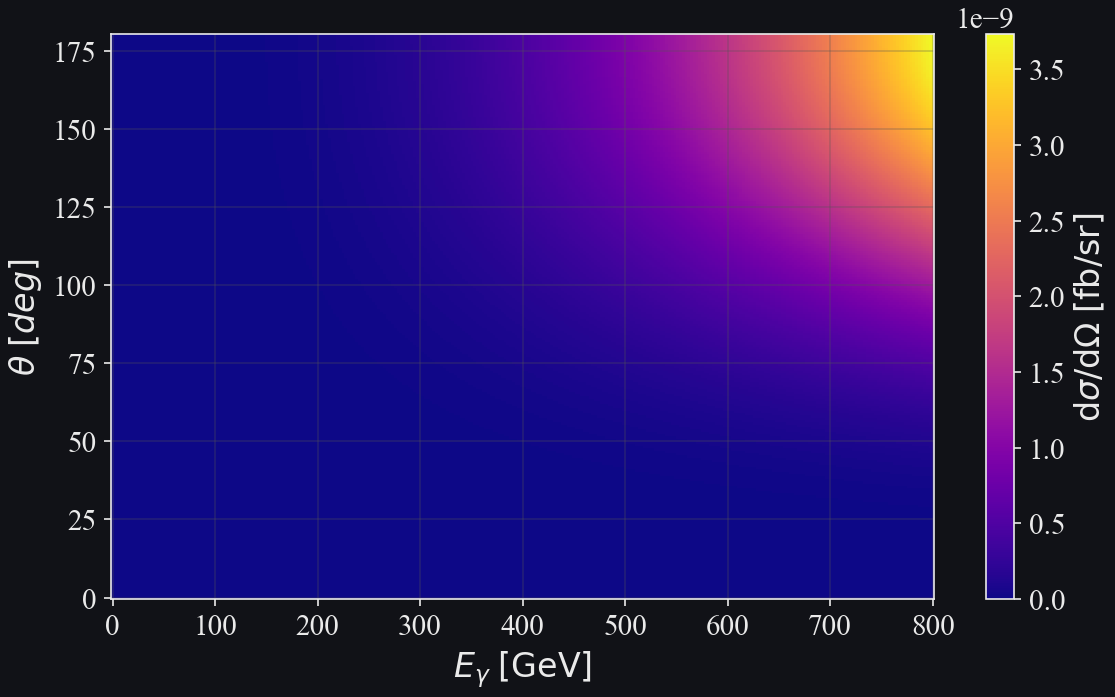

In [19]:
mchi  = MCHI       # GeV

energies   = np.linspace(1e-3, 800, 300)               # GeV
angles_deg = np.linspace(1e-3, 179.9, 240)              # deg
angles_rad = np.deg2rad(angles_deg)                    # rad

theta_grid = angles_rad[:, None]    
Eg_grid    = energies[None, :]         
dsig = get_dsigma_dOmega(mchi, theta_grid, Eg_grid)  # fb/sr

# Plot
fig, ax = plt.subplots(figsize=(8,5))
im = ax.pcolormesh(
    energies, angles_deg, dsig,
    shading="auto",
)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$\mathrm{d}\sigma/\mathrm{d}\Omega\;[\mathrm{fb/sr}]$')

ax.set_xlabel(r'$E_\gamma\;[\mathrm{GeV}]$')
ax.set_ylabel(r'$\theta\;[deg]$')
#ax.set_title(fr'$\chi\gamma \to \chi\gamma$') #cm frame

plt.tight_layout()
plt.savefig("plots/Weakly_egamma_vs_angle.png")
plt.show()


In [20]:
def sigma_total(mchi, Eg, *, which="full"):
    theta = np.linspace(1e-6, np.pi, 100)  # radians, avoid 0
    ftheta = np.sin(theta)*get_dsigma_dOmega(mchi, theta, Eg, frame="cm")
    return 2.0*np.pi*simpson(ftheta, theta)  # fb


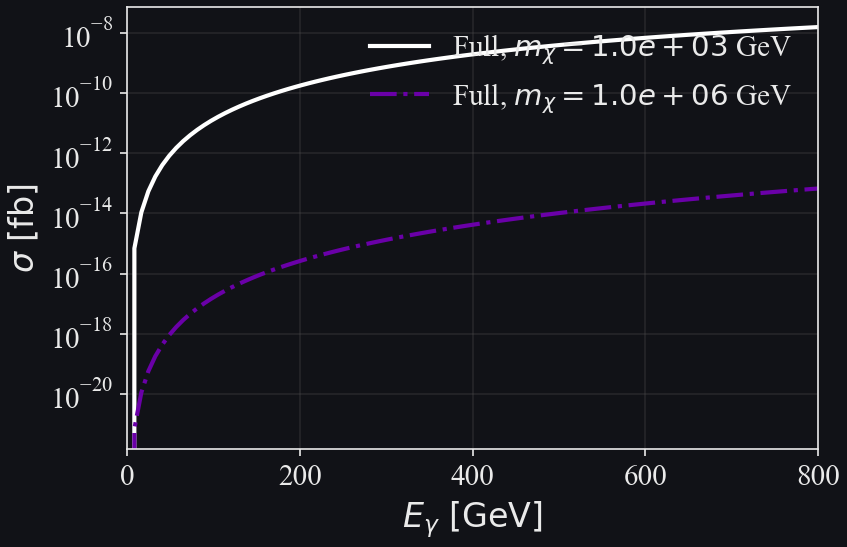

In [24]:

Egrid = np.linspace(0, 800, 100)   # GeV (avoid Eg=0)
mchi_1 = MCHI
mchi_2 = MCHI * 1e3

sigma_full_1  = np.array([sigma_total(mchi_1, Eg) for Eg in Egrid])
sigma_full_2  = np.array([sigma_total(mchi_2, Eg) for Eg in Egrid])

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(Egrid, sigma_full_1,  '-',   label=rf'Full, $m_\chi={mchi_1:.1e}$ GeV')
ax.plot(Egrid, sigma_full_2,  '-.',  label=rf'Full, $m_\chi={mchi_2:.1e}$ GeV')
ax.set_xlim(0, 800)
ax.set_xlabel(r'$E_\gamma\ \mathrm{[GeV]}$')
ax.set_ylabel(r'$\sigma\ \mathrm{[fb]}$')
#ax.set_title(r'$\chi\gamma \to \chi\gamma$ total cross section (Centre of Mass frame)')
ax.legend(frameon=False, loc='upper right')
ax.set_yscale('log')
plt.tight_layout()
plt.savefig("plots/Weakly_full_log.png")
plt.show()


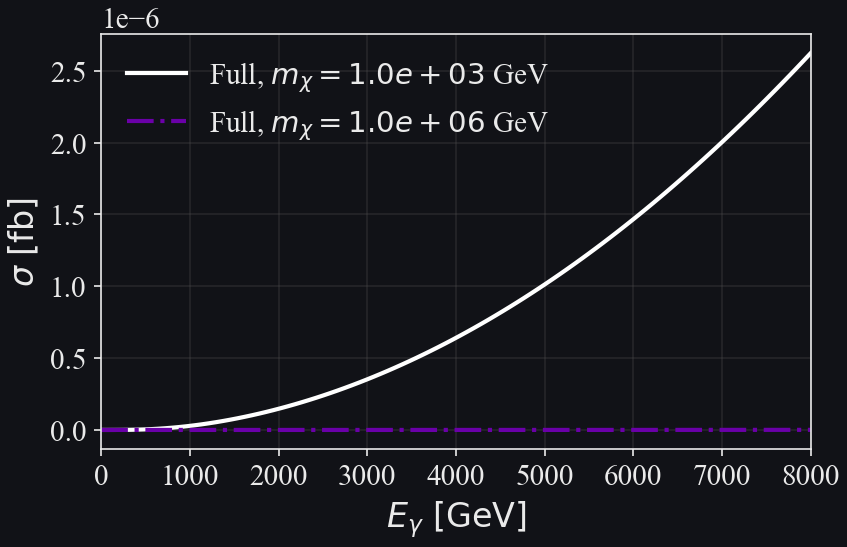

In [ ]:
Egrid = np.linspace(0.1, 8000, 100)   # GeV (avoid Eg=0)
mchi_1 = MCHI
mchi_2 = MCHI * 1e3

sigma_full_1  = np.array([sigma_total(mchi_1, Eg) for Eg in Egrid])
sigma_full_2  = np.array([sigma_total(mchi_2, Eg) for Eg in Egrid])

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(Egrid, sigma_full_1,  '-',   label=rf'Full, $m_\chi={mchi_1:.1e}$ GeV')
ax.plot(Egrid, sigma_full_2,  '-.',  label=rf'Full, $m_\chi={mchi_2:.1e}$ GeV')
ax.set_xlim(0, 8000)
ax.set_xlabel(r'$E_\gamma\ \mathrm{[GeV]}$')
ax.set_ylabel(r'$\sigma\ \mathrm{[fb]}$')
#ax.set_title(r'$\chi\gamma \to \chi\gamma$ total cross section (Centre of Mass frame)')
ax.legend(frameon=False, loc='upper left')
#ax.set_yscale('log')
plt.savefig("plots/Weakly_full_no_log.png")
plt.tight_layout()
plt.show()
